In [12]:
%pip install psycopg2

  Obtaining dependency information for psycopg2 from https://files.pythonhosted.org/packages/33/39/5a9a229bb5414abeb86e33b8fc8143ab0aecce5a7f698a53e31367d30caa/psycopg2-2.9.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 325.1 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.2 MB 388.9 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.2 MB 652.2 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.2 MB 803.1 kB/s eta 0:00:02
   -------- ------------------------------- 0.2/1.2 MB 942.1 kB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.2 MB 1.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.2 MB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 0.7/1.2 MB 1.7 MB/s eta 0:00:01
   ---------------------------- -

In [13]:
import psycopg2
from psycopg2 import Error

In [17]:
try:
    # Подключение к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="test_1")

    # Создание курсора для выполнения операций с базой данных
    cursor = connection.cursor()
    # Вывод информации о сервере PostgreSQL
    print("Информация о сервере PostgreSQL")
    print(connection.get_dsn_parameters(), "\n")
    # Выполнение SQL-запроса
    cursor.execute("SELECT version();")
    # Получение результата
    record = cursor.fetchone()
    print("Вы подключены к - ", record, "\n")

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

Информация о сервере PostgreSQL
{'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'test_1', 'host': 'localhost', 'port': '5432', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'} 

Вы подключены к -  ('PostgreSQL 17.4 on x86_64-windows, compiled by msvc-19.42.34436, 64-bit',) 

Соединение с PostgreSQL закрыто


In [16]:
try:
    # Подключение к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="test_1")

    cursor = connection.cursor()
    # SQL-запрос для создания новой таблицы
    create_table_query = '''CREATE TABLE mobile
          (ID INT PRIMARY KEY     NOT NULL,
          MODEL           TEXT    NOT NULL,
          PRICE           REAL); '''
    # Выполнение команды: создание новой таблицы
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица успешно создана в PostgreSQL")

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)
finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

Ошибка при подключении к PostgreSQL: ОШИБКА:  отношение "mobile" уже существует

Соединение с PostgreSQL закрыто


In [18]:
try:
    # Подключение к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="test_1")

    cursor = connection.cursor()
    # Выполнение SQL-запроса для вставки данных в таблицу
    insert_query = """ INSERT INTO mobile (ID, MODEL, PRICE) VALUES (1, 'Iphone12', 1100)"""
    cursor.execute(insert_query)
    connection.commit()
    print("1 запись успешно вставлена")

    # Получение результатов
    cursor.execute("SELECT * from mobile")
    record = cursor.fetchall()
    print("Результат:", record)

    # Выполнение SQL-запроса для обновления данных в таблице
    update_query = """Update mobile set price = 1500 where id = 1"""
    cursor.execute(update_query)
    connection.commit()
    count = cursor.rowcount
    print(count, "запись(ей) обновлено успешно")

    # Получение результатов
    cursor.execute("SELECT * from mobile")
    print("Результат:", cursor.fetchall())

    # Выполнение SQL-запроса для удаления данных из таблицы
    delete_query = """Delete from mobile where id = 1"""
    cursor.execute(delete_query)
    connection.commit()
    count = cursor.rowcount
    print(count, "запись(ей) удалено успешно")

    # Получение результатов
    cursor.execute("SELECT * from mobile")
    print("Результат:", cursor.fetchall())

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)
finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

1 запись успешно вставлена
Результат: [(1, 'Iphone12', 1100.0)]
1 запись(ей) обновлено успешно
Результат: [(1, 'Iphone12', 1500.0)]
1 запись(ей) удалено успешно
Результат: []
Соединение с PostgreSQL закрыто


# Practice 07. Упражнение/мини-проект
Информационная система больницы

## **Упражнение 1.** Подключитесь к серверу базы данных, создайте базу данных **medical_db** и таблицу **Hospital**

**Упражнение 1*.** Создайте таблицу **Doctor** и заполните эту таблицу данными в Postgre SQL

In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Создание подключения к базе данных sql_case_bi_mgpu (база, с которой можно создавать другие базы)
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="medical_db")
    connection.autocommit = True  # Отключаем транзакцию для команды CREATE DATABASE
    cursor = connection.cursor()

    # Создание базы данных
    cursor.execute("CREATE DATABASE medical_db;")
    print("База данных 'medical_db' успешно создана")

    # Закрытие текущего соединения для подключения к новой базе данных
    close_connection(connection)

    # Подключение к новой базе данных 'medical_db'
    connection = get_connection("medical_db")
    cursor = connection.cursor()

    # Создание таблицы Hospital
    create_table_query = '''
    CREATE TABLE Hospital (
        Hospital_Id serial NOT NULL PRIMARY KEY,
        Hospital_Name VARCHAR (100) NOT NULL,
        Bed_Count serial
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Hospital' успешно создана")

    # Вставка данных в таблицу Hospital
    insert_query = '''
    INSERT INTO Hospital (Hospital_Id, Hospital_Name, Bed_Count)
    VALUES
    (1, 'Mayo Clinic', 200),
    (2, 'Cleveland Clinic', 400),
    (3, 'Johns Hopkins', 1000),
    (4, 'UCLA Medical Center', 1500);
    '''
    cursor.execute(insert_query)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Hospital'")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Ошибка при подключении или работе с PostgreSQL: ОШИБКА:  база данных "medical_db" уже существует

Соединение с PostgreSQL закрыто


In [25]:
try:
    # Создание подключения к базе данных sql_case_bi_mgpu (база, с которой можно создавать другие базы)
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="medical_db")
    connection.autocommit = True  # Отключаем транзакцию для команды CREATE DATABASE
    cursor = connection.cursor()

    # Подключение к новой базе данных 'medical_db'
    connection = get_connection("medical_db")
    cursor = connection.cursor()

    # Создание таблицы Hospital
    create_table_query = '''
    CREATE TABLE Hospital (
        Hospital_Id serial NOT NULL PRIMARY KEY,
        Hospital_Name VARCHAR (100) NOT NULL,
        Bed_Count serial
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Hospital' успешно создана")

    # Вставка данных в таблицу Hospital
    insert_query = '''
    INSERT INTO Hospital (Hospital_Id, Hospital_Name, Bed_Count)
    VALUES
    (1, 'Mayo Clinic', 200),
    (2, 'Cleveland Clinic', 400),
    (3, 'Johns Hopkins', 1000),
    (4, 'UCLA Medical Center', 1500);
    '''
    cursor.execute(insert_query)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Hospital'")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Таблица 'Hospital' успешно создана
Данные успешно вставлены в таблицу 'Hospital'
Соединение с PostgreSQL закрыто


In [ ]:
CREATE TABLE Doctor (
    Doctor_Id serial NOT NULL PRIMARY KEY,
    Doctor_Name VARCHAR (100) NOT NULL,
    Hospital_Id serial NOT NULL,
    Joining_Date DATE NOT NULL,
    Speciality VARCHAR (100) NOT NULL,
    Salary INTEGER NOT NULL,
    Experience SMALLINT
);

-- Вставка данных о докторах
INSERT INTO Doctor (Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience)
VALUES
('101', 'David', '1', '2005-02-10', 'Pediatric', 40000, NULL),
('102', 'Michael', '1', '2018-07-23', 'Oncologist', 20000, NULL),
('103', 'Susan', '2', '2016-05-19', 'Garnacologist', 25000, NULL),
('104', 'Robert', '2', '2017-12-28', 'Pediatric', 28000, NULL),
('105', 'Linda', '3', '2004-06-04', 'Garnacologist', 42000, NULL),
('106', 'William', '3', '2012-09-11', 'Dermatologist', 30000, NULL),
('107', 'Richard', '4', '2014-08-21', 'Garnacologist', 32000, NULL),
('108', 'Karen', '4', '2011-10-17', 'Radiologist', 30000, NULL),
('109', 'James', '1', '2022-01-15', 'Cardiologist', 45000, 5),
('110', 'Emily', '1', '2023-04-10', 'Orthopedic Surgeon', 50000, 3),
('111', 'Olivia', '2', '2021-09-05', 'Neurologist', 42000, 4),
('112', 'John', '2', '2024-02-18', 'Surgeon', 60000, 2),
('113', 'Sophia', '3', '2022-07-30', 'Urologist', 38000, 6),
('114', 'Daniel', '3', '2025-03-22', 'Pulmonologist', 47000, 1),
('115', 'Isabella', '4', '2023-11-01', 'Pediatrician', 41000, 3),
('116', 'Liam', '4', '2022-05-25', 'Dermatologist', 35000, 4),
('117', 'Mia', '1', '2024-06-17', 'Gastroenterologist', 53000, 2),
('118', 'Lucas', '2', '2023-01-12', 'Anesthesiologist', 46000, 3);

## **Упражнение 2.** Подключитесь к серверу базы данных и распечатайте его версию

In [26]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключение к базе данных
    database_name = 'medical_db'
    connection = get_connection(database_name)
    cursor = connection.cursor()

    # Выполнение запроса для получения версии базы данных
    cursor.execute("SELECT version();")
    db_version = cursor.fetchone()

    # Вывод версии базы данных
    print("Версия PostgreSQL:", db_version[0])

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения
    if connection:
        close_connection(connection)

Версия PostgreSQL: PostgreSQL 17.4 on x86_64-windows, compiled by msvc-19.42.34436, 64-bit
Соединение с PostgreSQL закрыто


## **Упражнение 3.** Получить информацию о больнице и врачах с использованием идентификаторов больницы и врача

In [40]:
def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_hospital_detail(hospital_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о больнице
        select_query = """SELECT * FROM Hospital WHERE Hospital_Id = %s"""
        cursor.execute(select_query, (hospital_id,))
        records = cursor.fetchall()

        # Вывод информации о больнице
        print("Печать записи о больнице:")
        for row in records:
            print("Hospital Id:", row[0])
            print("Hospital Name:", row[1])
            print("Bed Count:", row[2])

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

def get_doctor_detail(doctor_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о докторе
        select_query = """SELECT * FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        records = cursor.fetchall()

        # Вывод информации о докторе
        print("Печать записи о докторе:")
        for row in records:
            print("Doctor Id:", row[0])
            print("Doctor Name:", row[1])
            print("Hospital Id:", row[2])
            print("Joining Date:", row[3])
            print("Specialty:", row[4])
            print("Salary:", row[5])
            print("Experience:", row[6])

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Запросить данные о больнице с ID 2 и докторе с ID 106
print("Упражнение 3. Чтение информации о больнице и докторе\n")
get_hospital_detail(2)
print("\n")
get_doctor_detail(106)

Упражнение 3. Чтение информации о больнице и докторе

Печать записи о больнице:
Соединение с PostgreSQL закрыто


Печать записи о докторе:
Doctor Id: 106
Doctor Name: William
Hospital Id: 3
Joining Date: 2012-09-11
Specialty: Dermatologist
Salary: 30000
Experience: 2
Соединение с PostgreSQL закрыто


## **Упражнение 4.** Получить список врачей по заданной специальности и зарплате

In [28]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

# Подключаемся к базе данных medical_db
database_name = 'medical_db'

def get_specialist_doctors_list(speciality, salary):
    try:
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения списка врачей по специальности и зарплате
        sql_select_query = """SELECT * FROM Doctor WHERE Speciality=%s AND Salary > %s"""
        cursor.execute(sql_select_query, (speciality, salary))
        records = cursor.fetchall()

        # Выводим информацию о врачах с указанной специальностью и зарплатой выше заданной
        print(f"Список врачей со специальностью {speciality} и зарплатой больше {salary}: \n")
        for row in records:
            print(f"Идентификатор врача: {row[0]}")
            print(f"Имя врача: {row[1]}")
            print(f"Идентификатор больницы: {row[2]}")
            print(f"Дата поступления: {row[3]}")
            print(f"Специальность: {row[4]}")
            print(f"Зарплата: {row[5]}")
            print(f"Опыт: {row[6]}\n")

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Вопрос 4: Получение списка врачей по заданной специальности и зарплате
print("Вопрос 4: Получить список врачей по заданной специальности и зарплате\n")
get_specialist_doctors_list("Pediatric", 20000)

Вопрос 4: Получить список врачей по заданной специальности и зарплате

Список врачей со специальностью Pediatric и зарплатой больше 20000: 

Идентификатор врача: 101
Имя врача: David
Идентификатор больницы: 1
Дата поступления: 2005-02-10
Специальность: Pediatric
Зарплата: 40000
Опыт: None

Идентификатор врача: 104
Имя врача: Robert
Идентификатор больницы: 2
Дата поступления: 2017-12-28
Специальность: Pediatric
Зарплата: 28000
Опыт: None

Соединение с PostgreSQL закрыто


## **Упражнение 5.** Получить список врачей по заданной специальности и зарплате

In [29]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_doctors_by_hospital(hospital_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения всех врачей из указанной больницы
        select_query = """SELECT * FROM Doctor WHERE Hospital_Id = %s"""
        cursor.execute(select_query, (hospital_id,))
        records = cursor.fetchall()

        # Проверка и вывод результатов
        print(f"\nСписок врачей из больницы с ID {hospital_id}:\n")
        if records:
            for row in records:
                print("ID врача:", row[0])
                print("Имя врача:", row[1])
                print("ID больницы:", row[2])
                print("Дата начала работы:", row[3])
                print("Специальность:", row[4])
                print("Зарплата:", row[5])
                print("Опыт:", row[6], "\n")
        else:
            print("Врачи не найдены.")

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Вызов функции для больницы с ID 3
print("Упражнение 5. Получение списка врачей из определённой больницы\n")
get_doctors_by_hospital(3)

Упражнение 5. Получение списка врачей из определённой больницы


Список врачей из больницы с ID 3:

ID врача: 105
Имя врача: Linda
ID больницы: 3
Дата начала работы: 2004-06-04
Специальность: Garnacologist
Зарплата: 42000
Опыт: None 

ID врача: 106
Имя врача: William
ID больницы: 3
Дата начала работы: 2012-09-11
Специальность: Dermatologist
Зарплата: 30000
Опыт: None 

ID врача: 113
Имя врача: Sophia
ID больницы: 3
Дата начала работы: 2022-07-30
Специальность: Urologist
Зарплата: 38000
Опыт: 6 

ID врача: 114
Имя врача: Daniel
ID больницы: 3
Дата начала работы: 2025-03-22
Специальность: Pulmonologist
Зарплата: 47000
Опыт: 1 

Соединение с PostgreSQL закрыто


## **Задание 6**. Обновить стаж врача в годах. Показать информацию до и после обновления.

Подготовка поля для обновления

In [1]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def update_experience(doctor_id, new_experience):
    try:
        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем стаж доктора с указанным ID
        update_query = """UPDATE Doctor SET Experience = %s WHERE Doctor_Id = %s"""
        cursor.execute(update_query, (new_experience, doctor_id))
        connection.commit()

        print(f"Стаж врача с ID {doctor_id} успешно обновлен на {new_experience} лет")

        # Печать данных о докторе после обновления
        select_query = """SELECT Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience
                          FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        doctor_record = cursor.fetchone()

        if doctor_record:
            print("\nИнформация о докторе после обновления:")
            print(f"Doctor Id: {doctor_record[0]}")
            print(f"Doctor Name: {doctor_record[1]}")
            print(f"Hospital Id: {doctor_record[2]}")
            print(f"Joining Date: {doctor_record[3]}")
            print(f"Speciality: {doctor_record[4]}")
            print(f"Salary: {doctor_record[5]}")
            print(f"Experience: {doctor_record[6]}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Обновим стаж врача с ID 101 на 3 года
print("Задание: Обновить стаж врачу с ID 101 на 3 года\n")
update_experience(101, 3)

Задание: Обновить стаж врачу с ID 101 на 3 года

Стаж врача с ID 101 успешно обновлен на 3 лет

Информация о докторе после обновления:
Doctor Id: 101
Doctor Name: David
Hospital Id: 1
Joining Date: 2005-02-10
Speciality: Pediatric
Salary: 40000
Experience: 3
Соединение с PostgreSQL закрыто


решение 6 задания

In [2]:
import psycopg2
from datetime import datetime

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_experience_in_years(doctor_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о докторе
        select_query = """SELECT Joining_Date, Experience FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        result = cursor.fetchone()

        if result:
            # Получаем дату присоединения и текущий опыт
            joining_date, current_experience = result

            # Если опыт уже установлен в базе данных, добавляем новые года
            if current_experience is not None:
                current_date = datetime.now()
                # Рассчитываем, сколько лет прошло с момента последнего обновления стажа
                years_since_last_update = current_date.year - (joining_date.year + current_experience)
                # Учитываем месяц и день, чтобы избежать пересчета в том же году
                if (current_date.month, current_date.day) < (joining_date.month, joining_date.day):
                    years_since_last_update -= 1
                new_experience = current_experience + years_since_last_update
                print(f"Текущий стаж (с учетом прошедших лет): {new_experience} лет")
                return new_experience
            else:
                # Если опыта нет, рассчитываем его с момента присоединения
                current_date = datetime.now()
                experience_years = current_date.year - joining_date.year - ((current_date.month, current_date.day) < (joining_date.month, joining_date.day))
                print(f"Расчитанный стаж: {experience_years} лет")
                return experience_years
        else:
            print("Доктор не найден")
            return None

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)
        return None

    finally:
        # Закрытие подключения
        close_connection(connection)

def update_experience(doctor_id):
    try:
        # Получаем стаж до обновления
        experience_before = get_experience_in_years(doctor_id)

        if experience_before is None:
            return

        print(f"Стаж до обновления: {experience_before} лет")

        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем стаж в базе данных
        update_query = """UPDATE Doctor SET Experience = %s WHERE Doctor_Id = %s"""
        cursor.execute(update_query, (experience_before, doctor_id))
        connection.commit()

        # Получаем стаж после обновления
        experience_after = get_experience_in_years(doctor_id)

        print(f"Стаж после обновления: {experience_after} лет")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Вызов функции для обновления стажа врача с ID 101
print("Задание 6. Обновить стаж врача в годах и показать до и после\n")
update_experience(101)

Задание 6. Обновить стаж врача в годах и показать до и после

Текущий стаж (с учетом прошедших лет): 20 лет
Соединение с PostgreSQL закрыто
Стаж до обновления: 20 лет
Текущий стаж (с учетом прошедших лет): 20 лет
Соединение с PostgreSQL закрыто
Стаж после обновления: 20 лет
Соединение с PostgreSQL закрыто


## Индивидуальное задание. Вариант 6 (выполнен по ошибке)

Задание 1. Создайте таблицу "appointments" с полями "ID", "DOCTOR_ID", "DATE"

In [3]:
try:
    # Создание подключения к базе данных sql_case_bi_mgpu (база, с которой можно создавать другие базы)
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="medical_db")
    connection.autocommit = True  # Отключаем транзакцию для команды CREATE DATABASE
    cursor = connection.cursor()

    # Подключение к новой базе данных 'medical_db'
    connection = get_connection("medical_db")
    cursor = connection.cursor()

    # Создание таблицы Appointments
    create_table_query = '''
    CREATE TABLE Appointments (
        Appointments_Id serial NOT NULL PRIMARY KEY,
        DOCTOR_Id INT NOT NULL,
        Appointments_Date DATE NOT NULL
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Appointments' успешно создана")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Ошибка при подключении или работе с PostgreSQL: ОШИБКА:  отношение "appointments" уже существует

Соединение с PostgreSQL закрыто


Задание 2. Выполните SQL-запрос для обновления зарплаты врача с ID=105.

In [4]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def update_experience(doctor_id, new_salary):
    try:
        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем зарплату доктора с указанным ID
        update_query = """UPDATE Doctor SET salary = %s WHERE Doctor_Id = %s"""
        cursor.execute(update_query, (new_salary, doctor_id))
        connection.commit()

        print(f"зарплата врача с ID {doctor_id} успешно обновлена на {new_salary} рублей")

        # Печать данных о докторе после обновления
        select_query = """SELECT Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience
                          FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        doctor_record = cursor.fetchone()

        if doctor_record:
            print("\nИнформация о докторе после обновления:")
            print(f"Doctor Id: {doctor_record[0]}")
            print(f"Doctor Name: {doctor_record[1]}")
            print(f"Hospital Id: {doctor_record[2]}")
            print(f"Joining Date: {doctor_record[3]}")
            print(f"Speciality: {doctor_record[4]}")
            print(f"Salary: {doctor_record[5]}")
            print(f"Experience: {doctor_record[6]}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Обновим зарплату врача с ID 101 на 40000 рублей
print("Задание: Обновить зарплату врачу с ID 101 на 40000 рублей\n")
update_experience(101, 40000)

Задание: Обновить зарплату врачу с ID 101 на 40000 рублей

зарплата врача с ID 101 успешно обновлена на 40000 рублей

Информация о докторе после обновления:
Doctor Id: 101
Doctor Name: David
Hospital Id: 1
Joining Date: 2005-02-10
Speciality: Pediatric
Salary: 40000
Experience: 20
Соединение с PostgreSQL закрыто


Задание 3. Получите все записи о больнице с ID=3.

In [5]:
def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_hospital_detail(hospital_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о больнице
        select_query = """SELECT * FROM Hospital WHERE Hospital_Id = %s"""
        cursor.execute(select_query, (hospital_id,))
        records = cursor.fetchall()

        # Вывод информации о больнице
        print("Печать записи о больнице:")
        for row in records:
            print("Hospital Id:", row[0])
            print("Hospital Name:", row[1])
            print("Bed Count:", row[2])

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Запросить данные о больнице с ID 3
print("Задание: Чтение информации о больнице\n")
get_hospital_detail(3)
print("\n")

Задание: Чтение информации о больнице

Печать записи о больнице:
Соединение с PostgreSQL закрыто




Задание 4. Обновите стаж врача с ID=106.

In [6]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def update_experience(doctor_id, new_experience):
    try:
        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем стаж доктора с указанным ID
        update_query = """UPDATE Doctor SET Experience = %s WHERE Doctor_Id = %s"""
        cursor.execute(update_query, (new_experience, doctor_id))
        connection.commit()

        print(f"Стаж врача с ID {doctor_id} успешно обновлен на {new_experience} лет")

        # Печать данных о докторе после обновления
        select_query = """SELECT Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience
                          FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        doctor_record = cursor.fetchone()

        if doctor_record:
            print("\nИнформация о докторе после обновления:")
            print(f"Doctor Id: {doctor_record[0]}")
            print(f"Doctor Name: {doctor_record[1]}")
            print(f"Hospital Id: {doctor_record[2]}")
            print(f"Joining Date: {doctor_record[3]}")
            print(f"Speciality: {doctor_record[4]}")
            print(f"Salary: {doctor_record[5]}")
            print(f"Experience: {doctor_record[6]}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Обновим стаж врача с ID 106 на 2 года
print("Задание: Обновить стаж врачу с ID 106 на 2 года\n")
update_experience(106, 2)

Задание: Обновить стаж врачу с ID 106 на 2 года

Стаж врача с ID 106 успешно обновлен на 2 лет

Информация о докторе после обновления:
Doctor Id: 106
Doctor Name: William
Hospital Id: 3
Joining Date: 2012-09-11
Speciality: Dermatologist
Salary: 30000
Experience: 2
Соединение с PostgreSQL закрыто


Задание 5. Постройте график зависимости зарплаты от опыта врачей. Для этого выведем данные о зарплате и опрыте.

In [28]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_doctors_by_hospital(hospital_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения всех врачей из указанной больницы
        select_query = """SELECT doctor_id, salary, experience FROM Doctor WHERE Hospital_Id = %s"""
        cursor.execute(select_query, (hospital_id,))
        records = cursor.fetchall()

        # Проверка и вывод результатов
        print(f"\nСписок врачей из больницы с ID {hospital_id}:\n")
        if records:
            for row in records:
                print("ID врача:", row[0])
                print("Зарплата:", row[1])
                print("Опыт:", row[2], "\n")
        else:
            print("Врачи не найдены.")

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Вызов функции для больницы с ID *
print("Упражнение 5. Получение списка врачей, их зарплат и стажа\n")
get_doctors_by_hospital(1)

Упражнение 5. Получение списка врачей, их зарплат и стажа


Список врачей из больницы с ID 1:

ID врача: 102
Зарплата: 20000
Опыт: None 

ID врача: 109
Зарплата: 45000
Опыт: 5 

ID врача: 110
Зарплата: 50000
Опыт: 3 

ID врача: 117
Зарплата: 53000
Опыт: 2 

ID врача: 101
Зарплата: 40000
Опыт: 20 

Соединение с PostgreSQL закрыто


## Индивидуальные задания. Вариант 7.

Задание 1. Подключитесь к базе и создайте таблицу "employee".

In [10]:
try:
    # Создание подключения к базе данных sql_case_bi_mgpu (база, с которой можно создавать другие базы)
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="medical_db")
    connection.autocommit = True  # Отключаем транзакцию для команды CREATE DATABASE
    cursor = connection.cursor()

    # Подключение к новой базе данных 'medical_db'
    connection = get_connection("medical_db")
    cursor = connection.cursor()

    # Создание таблицы employee
    create_table_query = '''
    CREATE TABLE employee (
        employee_Id serial NOT NULL PRIMARY KEY
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'employee' успешно создана")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Таблица 'employee' успешно создана
Соединение с PostgreSQL закрыто


Задание 2. Получите информацию о больнице с ID=2.

In [13]:
def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_hospital_detail(hospital_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о больнице
        select_query = """SELECT * FROM Hospital WHERE Hospital_Id = %s"""
        cursor.execute(select_query, (hospital_id,))
        records = cursor.fetchall()

        # Вывод информации о больнице
        print("Печать записи о больнице:")
        for row in records:
            print("Hospital Id:", row[0])
            print("Hospital Name:", row[1])
            print("Bed Count:", row[2])

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Получить информацию о больнице с ID 2
print("Задание: Чтение информации о больнице\n")
get_hospital_detail(2)
print("\n")

Задание: Чтение информации о больнице

Печать записи о больнице:
Hospital Id: 2
Hospital Name: City Clinic
Bed Count: 200
Соединение с PostgreSQL закрыто




Задане 3. Создайте таблицу "Patient" с полями "ID", "NAME", "AGE".

In [ ]:
try:
    # Создание подключения к базе данных sql_case_bi_mgpu (база, с которой можно создавать другие базы)
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="medical_db")
    connection.autocommit = True  # Отключаем транзакцию для команды CREATE DATABASE
    cursor = connection.cursor()

    # Подключение к новой базе данных 'medical_db'
    connection = get_connection("medical_db")
    cursor = connection.cursor()

    # Создание таблицы patient
    create_table_query = '''
    CREATE TABLE patient (
        patient_Id serial NOT NULL PRIMARY KEY,
        AGE INT NOT NULL,
        NAME VARCHAR (100) NOT NULL
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'patient' успешно создана")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Таблица 'Appointments' успешно создана
Соединение с PostgreSQL закрыто


Задание 4. Получите список всех врачей, работающих более 5 лет в "Mayo Clinic".

In [26]:
def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_doctors_with_experience(hospital_name, min_experience_years=5):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о докторе
        select_query = """
            SELECT d.doctor_id, d.doctor_name, d.joining_date, 
                    EXTRACT(YEAR FROM AGE(CURRENT_DATE, d.joining_date)) as experience
            FROM doctor d
            JOIN Hospital h ON d.hospital_id = h.Hospital_Id
            WHERE h.Hospital_Name = %s 
            AND EXTRACT(YEAR FROM AGE(CURRENT_DATE, d.joining_date)) > %s
            ORDER BY experience DESC;
        """
        cursor.execute(select_query, (hospital_name, min_experience_years))
        records = cursor.fetchall()

        # Вывод информации о докторе
        print("Печать записи о больнице:")
        for row in records:
            print("doctor_id:", row[0])
            print("doctor_name:", row[1])
            print("joining_date:", row[2])
            print("experience (years):", row[3])

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Пример вызова:
print("Задание: Получить врачей Mayo Clinic со стажем >5 лет\n")
get_doctors_with_experience("Mayo Clinic", 5)
print("\n")

Задание: Получить врачей Mayo Clinic со стажем >5 лет

Печать записи о больнице:
doctor_id: 105
doctor_name: Linda
joining_date: 2004-06-04
experience (years): 20
doctor_id: 106
doctor_name: William
joining_date: 2012-09-11
experience (years): 12
Соединение с PostgreSQL закрыто




Задание 5. Визуализируйте распределение зарплат врачей в виде столбчатой диаграммы.

In [38]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_doctors(doctor_id=None):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения всех врачей и их зарплат
        select_query = """
        SELECT doctor_id, salary FROM Doctor
        ORDER BY doctor_id ASC"""
        cursor.execute(select_query)
        records = cursor.fetchall()

        # Проверка и вывод результатов
        print(f"\nСписок врачей и их зарплат:\n")
        if records:
            for row in records:
                print("ID врача:", row[0])
                print("Зарплата:", row[1])
        else:
            print("Врачи не найдены.")

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Вызов функции для получения списка врачей и их зарплат
print("Упражнение 5. Получение списка врачей и их зарплат\n")
get_doctors()

Упражнение 5. Получение списка врачей и их зарплат


Список врачей и их зарплат:

ID врача: 101
Зарплата: 40000
ID врача: 102
Зарплата: 20000
ID врача: 103
Зарплата: 25000
ID врача: 104
Зарплата: 28000
ID врача: 105
Зарплата: 42000
ID врача: 106
Зарплата: 30000
ID врача: 107
Зарплата: 32000
ID врача: 108
Зарплата: 30000
ID врача: 109
Зарплата: 45000
ID врача: 110
Зарплата: 50000
ID врача: 111
Зарплата: 42000
ID врача: 112
Зарплата: 60000
ID врача: 113
Зарплата: 38000
ID врача: 114
Зарплата: 47000
ID врача: 115
Зарплата: 41000
ID врача: 116
Зарплата: 35000
ID врача: 117
Зарплата: 53000
ID врача: 118
Зарплата: 46000
Соединение с PostgreSQL закрыто


Упражнение 5. Визуализация зарплат врачей



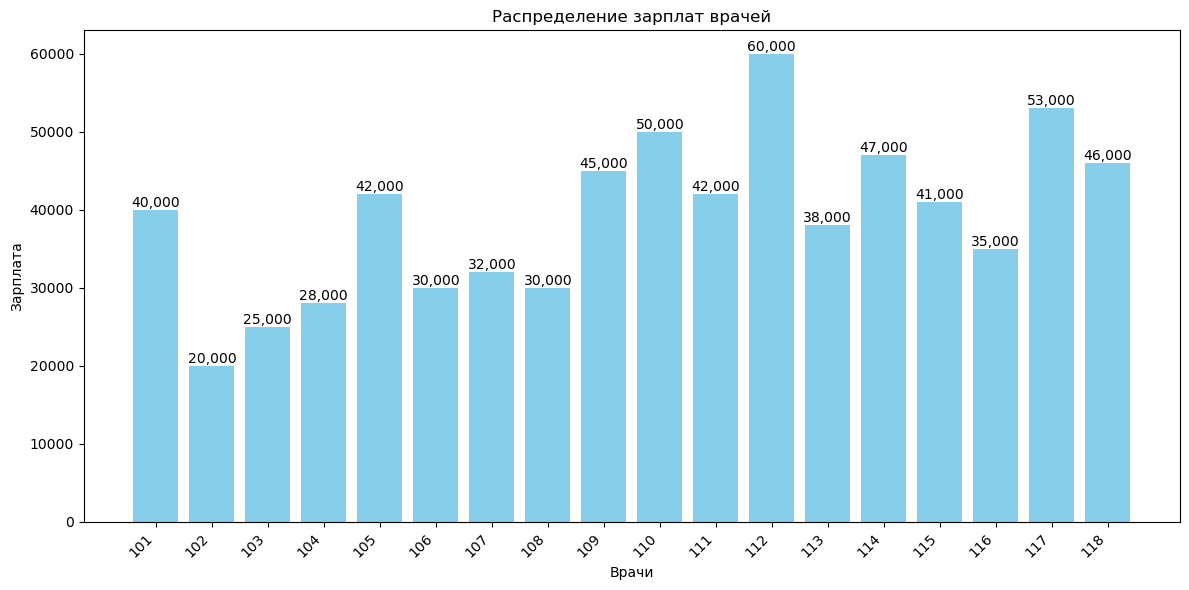

In [43]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def get_doctors(doctor_id=None):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения всех врачей и их зарплат
        select_query = """
        SELECT doctor_id, salary FROM Doctor
        ORDER BY doctor_id ASC"""
        cursor.execute(select_query)
        records = cursor.fetchall()

        # Деление данных на ID и зарплаты
        id = [row[0] for row in records]
        salaries = [row[1] for row in records]
        
        return id, salaries

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

def plot_salary_distribution(id, salaries):
    """Строит столбчатую диаграмму распределения зарплат"""
    plt.figure(figsize=(12, 6))
    
    # Создаем индексы для столбцов
    indices = np.arange(len(id))
    
    # Создаем столбчатую диаграмму
    bars = plt.bar(indices, salaries, color='skyblue')
    
    # Добавляем значения зарплат над столбцами
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:,}',
                 ha='center', va='bottom')
    
    # Настраиваем оси и заголовок
    plt.xticks(indices, id, rotation=45, ha='right')
    plt.xlabel('Врачи')
    plt.ylabel('Зарплата')
    plt.title('Распределение зарплат врачей')
    plt.tight_layout()
    plt.show()

# Получаем данные
print("Упражнение 5. Визуализация зарплат врачей\n")
doctor_id, salaries = get_doctors()

# Строим график, если данные получены
if doctor_id and salaries:
    plot_salary_distribution(doctor_id, salaries)